### Pset 1: Problem 1c

#### Variables and Equations:

 1: $G = 1$ 
 
 2: $M = 1$ 
 
 3: $R = 1$ 
 
 4: $F = \frac{G M}{R^2}$
 
 5: $v_{esc} = \sqrt{\frac{2 G M}{R}}$
 
 6: $v_{rel} = \frac{v_{esc}}{2}$
 
 7: $b_{scat} = R (\frac{v_{esc}}{v_{rel}})^2$
 
 8: $b_{coll} = R \sqrt{(1 + b_{scat}/R)}$
 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
plt.rc('font', size=18)

In [2]:
#Setting up equations folloring the preamble

G = 1
M = 1
R = 1

v_esc = np.sqrt(2*G*M/R)
v_rel = v_esc/2

b_scat = R*(v_esc/v_rel)**2
b_scat2 = 2*b_scat
b_coll = R*np.sqrt(1 + b_scat/R)

In [5]:
# function to get derivative vector for odeint
def get_derivatives(vector, t):
    x, y, vx, vy = vector 
    
    d = np.sqrt(x**2 + y**2)
    
    a_mag = -1*G*M/d**2
    
    ax = a_mag * (x/d)
    ay = a_mag * (y/d)
    
    return [vx, vy, ax, ay]

#defining my integration length. No intuition for how long or dense this should be.
start = 0
end = 100
dt = 0.1

time_arr = np.arange(start, end, dt)

#defining initial conditions for the 3 cases
vector_01 = [-10, b_coll, v_rel,0]
vector_02 = [-10, b_scat, v_rel,0]
vector_03 = [-10, b_scat2, v_rel,0]

#getting the respective orbits
orbit1 = odeint(get_derivatives, vector_01, time_arr)
orbit2 = odeint(get_derivatives, vector_02, time_arr)
orbit3 = odeint(get_derivatives, vector_03, time_arr)

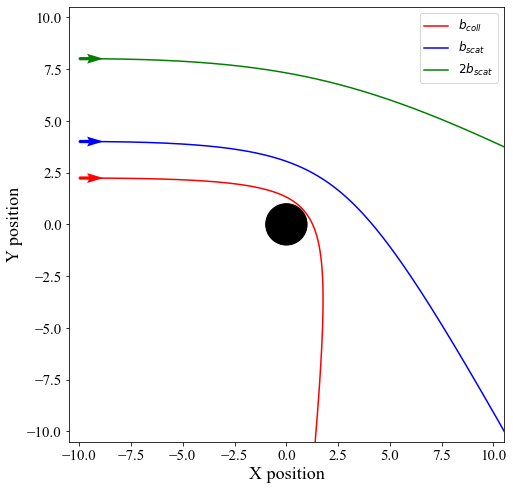

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

#plotting the big object at the origin
circle = plt.Circle((0, 0), R, color='k')
ax.add_artist(circle)

#plotting each orbit
plt.plot(orbit1[:,0], orbit1[:,1], color='r', label=r'$b_{coll}$')
plt.plot(orbit2[:,0], orbit2[:,1], color='b', label=r'$b_{scat}$')
plt.plot(orbit3[:,0], orbit3[:,1], color='g', label=r'$2b_{scat}$')

#plotting initial condition vector for each
plt.quiver(-10, b_coll, vector_01[2], vector_01[3], color='r')
plt.quiver(-10, b_scat, vector_02[2], vector_02[3], color='b')
plt.quiver(-10, b_scat2, vector_03[2], vector_03[3], color='g')

#basic plotting stuff
plt.axis([-10.5,10.5,-10.5,10.5])
plt.gca().set_aspect('equal')
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.show()